In [1]:
!unzip renfe.csv.zip

Archive:  renfe.csv.zip
  inflating: renfe.csv               


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 data = pd.read_csv("renfe.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.shape

(2579771, 9)

In [4]:
data.columns

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [5]:
data.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [6]:
data[:10]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo
6,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:45:00,2019-05-29 12:27:00,INTERCITY,62.20,Turista,Flexible
7,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 10:00:00,2019-05-29 12:32:00,AVE,47.30,Turista,Promo
8,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 11:00:00,2019-05-29 13:32:00,AVE,53.40,Turista,Promo
9,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 11:05:00,2019-05-29 13:41:00,ALVIA,NaN,Turista,Promo


In [7]:
data.isna().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

In [8]:
data.price.max(), data.price.min(), data.price.mean()

(214.2, 15.45, 63.38550341776677)

In [0]:
#Change these columns into datetime type.
dates = ["insert_date","start_date","end_date"]
for i in dates:
  data[i] = pd.to_datetime(data[i])     

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579771 entries, 0 to 2579770
Data columns (total 9 columns):
insert_date    datetime64[ns]
origin         object
destination    object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type     object
price          float64
train_class    object
fare           object
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 196.8+ MB


In [11]:
data['train_class'].value_counts()

Turista               1950303
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [12]:
data['fare'].value_counts()

Promo                  1733423
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

In [0]:
#Fill the missing value in fare column be the mode value.
data['fare'].fillna(data['fare'].mode()[0],inplace=True)

In [14]:
data['fare'].value_counts()

Promo                  1743087
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

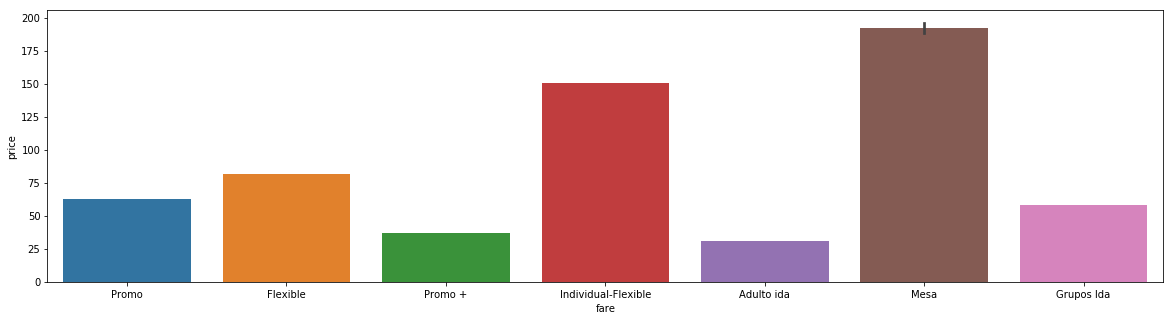

In [16]:
fig, ax = plt.subplots(figsize=[20,5])
sns.barplot(x="fare", y="price", data=data, ax = ax)

Majority of people are taking Promo fare because of the reasonable price.. 

In [0]:
#Fill the train_class missing values with the mode value
data['train_class'].fillna(data['train_class'].mode()[0],inplace=True)

In [16]:
data['train_class'].value_counts()

Turista               1959967
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [0]:
#Fill the missing values in price column based on 'fare' column 
data.loc[data.price.isnull(), 'price'] = data.groupby(['fare']).price.transform('mean')

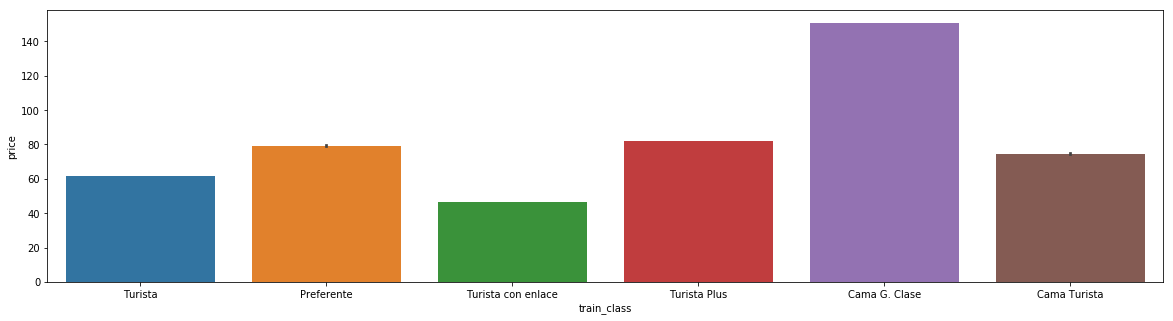

In [20]:
fig, ax = plt.subplots(figsize=[20,5])
sns.barplot(x="train_class", y="price", data=data, ax = ax)

Majority of people travel in Turista class because of the reasonable price.

In [18]:
#Check for the missing values again.
data.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [19]:
data["origin"].value_counts()


MADRID        1359423
BARCELONA      405621
SEVILLA        398445
VALENCIA       323086
PONFERRADA      93196
Name: origin, dtype: int64

In [20]:
data["destination"].value_counts()

MADRID        1220348
BARCELONA      480074
SEVILLA        413155
VALENCIA       399679
PONFERRADA      66515
Name: destination, dtype: int64

In [21]:
data["start_date"].dt.month.value_counts()

5    1850391
4     495071
6     218707
7      15602
Name: start_date, dtype: int64

So the 5th Month is the busiest month. 

In [22]:
data["start_date"].dt.year.value_counts()

2019    2579771
Name: start_date, dtype: int64

In [23]:
data["end_date"].dt.year.value_counts()

2019    2579771
Name: end_date, dtype: int64

OK.. SO the whole dataset is of 2019. We can safely ignore year value then.

**Feature Enginerring**

In [0]:
for c in ["insert_date","start_date","end_date"]:
  data[c+"_hour"] = data[c].dt.hour
  data[c+"_minute"] = data[c].dt.minute
  data[c+"_weekday"] = data[c].dt.weekday_name
  data[c+"_month"] = data[c].dt.month
  data[c+"_day"] = data[c].dt.day

In [0]:
data["is_travelling_end_on_same_day"] = np.where(data["start_date"].dt.date == data["end_date"].dt.date, "Yes", "No")

In [26]:
data.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,insert_date_hour,insert_date_minute,insert_date_weekday,insert_date_month,insert_date_day,start_date_hour,start_date_minute,start_date_weekday,start_date_month,start_date_day,end_date_hour,end_date_minute,end_date_weekday,end_date_month,end_date_day,is_travelling_end_on_same_day
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,5,31,Friday,4,19,6,20,Wednesday,5,29,9,16,Wednesday,5,29,Yes
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,5,31,Friday,4,19,7,0,Wednesday,5,29,9,32,Wednesday,5,29,Yes
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,5,31,Friday,4,19,7,30,Wednesday,5,29,9,51,Wednesday,5,29,Yes
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,5,31,Friday,4,19,8,0,Wednesday,5,29,10,32,Wednesday,5,29,Yes
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,62.582549,Turista,Promo,5,31,Friday,4,19,8,30,Wednesday,5,29,11,14,Wednesday,5,29,Yes


In [27]:
data.corr().style.background_gradient(cmap='coolwarm')

,price,insert_date_hour,insert_date_minute,insert_date_month,insert_date_day,start_date_hour,start_date_minute,start_date_month,start_date_day,end_date_hour,end_date_minute,end_date_month,end_date_day
price,1,-0.000440521,-0.0219443,0.0212305,-0.0238073,0.074878,-0.18934,-0.145988,-0.0102967,-0.00377962,-0.0261819,-0.146235,-0.0104087
insert_date_hour,-0.000440521,1,-0.00823412,0.00197507,-0.0218855,-0.00103866,-0.00229371,0.012294,-0.000760426,-0.00114136,0.000722572,0.0123035,-0.000760913
insert_date_minute,-0.0219443,-0.00823412,1,0.0529708,0.0223604,-0.00516528,0.0552954,0.0173344,-0.0140321,0.0195436,-0.00225393,0.0171188,-0.0139071
insert_date_month,0.0212305,0.00197507,0.0529708,1,-0.778119,-0.0102299,-0.0182319,0.333571,-0.0417019,-0.00535858,-0.000304721,0.333342,-0.0413458
insert_date_day,-0.0238073,-0.0218855,0.0223604,-0.778119,1,0.000778626,0.00712508,-0.136454,0.01096,0.000252189,0.00130504,-0.136178,0.0105265
start_date_hour,0.074878,-0.00103866,-0.00516528,-0.0102299,0.000778626,1,-0.0816266,-0.0225636,-0.0093653,0.733342,0.0248042,-0.0203127,-0.0101405
start_date_minute,-0.18934,-0.00229371,0.0552954,-0.0182319,0.00712508,-0.0816266,1,-0.00993822,-0.00286976,0.0412657,-0.0988493,-0.0104531,-0.00249307
start_date_month,-0.145988,0.012294,0.0173344,0.333571,-0.136454,-0.0225636,-0.00993822,1,-0.457119,0.0160979,-0.00685677,0.998793,-0.4554
start_date_day,-0.0102967,-0.000760426,-0.0140321,-0.0417019,0.01096,-0.0093653,-0.00286976,-0.457119,1,-0.0210225,0.0212718,-0.455088,0.996158
end_date_hour,-0.00377962,-0.00114136,0.0195436,-0.00535858,0.000252189,0.733342,0.0412657,0.0160979,-0.0210225,1,0.0635461,0.0120839,-0.0195739


It is clear from the above table that the correlations between the columns are there except between start_date's and end_date's day and month. 

Let's see on which date people travel more.

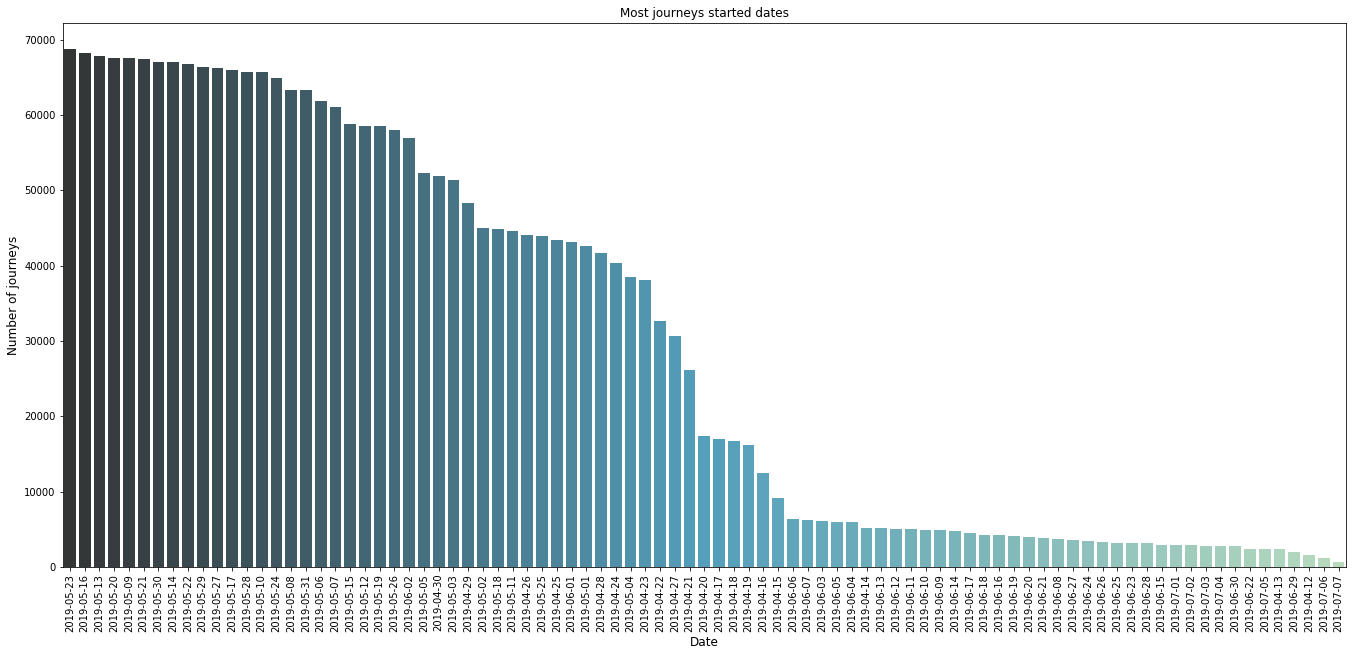

In [28]:
strt_date  = data['start_date'].dt.date.value_counts()
plt.figure(figsize=(23,10))
sns.barplot(strt_date.index, strt_date.values,palette = "GnBu_d")
plt.title('Most journeys started dates')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

In [29]:
(data["is_travelling_end_on_same_day"].value_counts() / data.index.size) * 100

Yes    98.259884
No      1.740116
Name: is_travelling_end_on_same_day, dtype: float64

98% of the travel ends on the same day.

Now let's see which are the busiest hours.

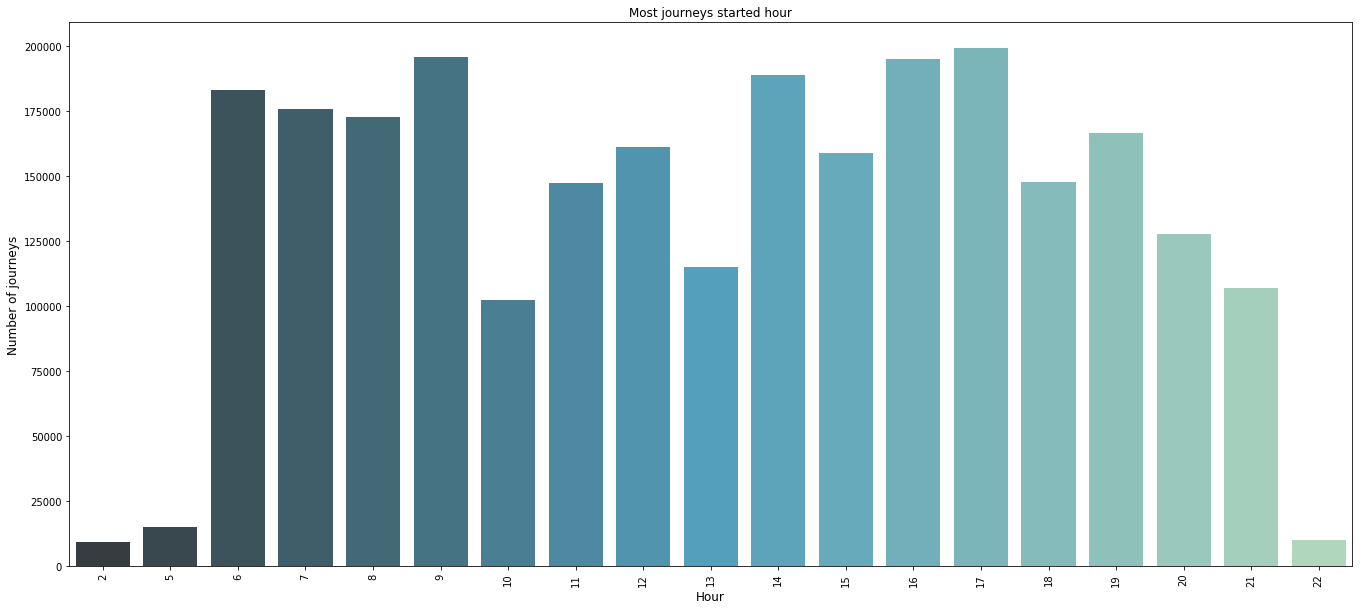

In [30]:
strt_date  = data['start_date'].dt.hour.value_counts()
plt.figure(figsize=(23,10))
sns.barplot(strt_date.index, strt_date.values, palette = "GnBu_d")
plt.title('Most journeys started hour')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Majority of people travel at 9 am and 4 p.m and 5 p.m. <br>
overall we can say that majority of people likes to travel early morning between 6 to 9. And then at the start of the evening. And very less during midnight.

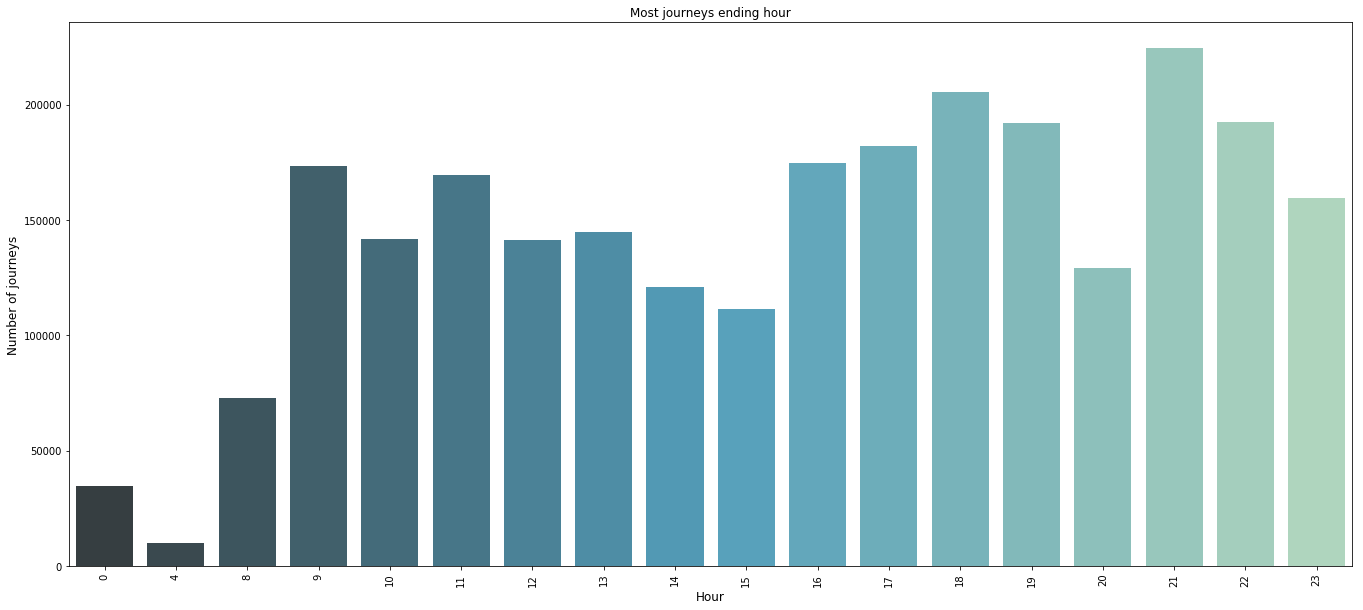

In [31]:
end_date_  = data['end_date'].dt.hour.value_counts()
plt.figure(figsize=(23,10))
sns.barplot(end_date_.index, end_date_.values, palette = "GnBu_d")
plt.title('Most journeys ending hour')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

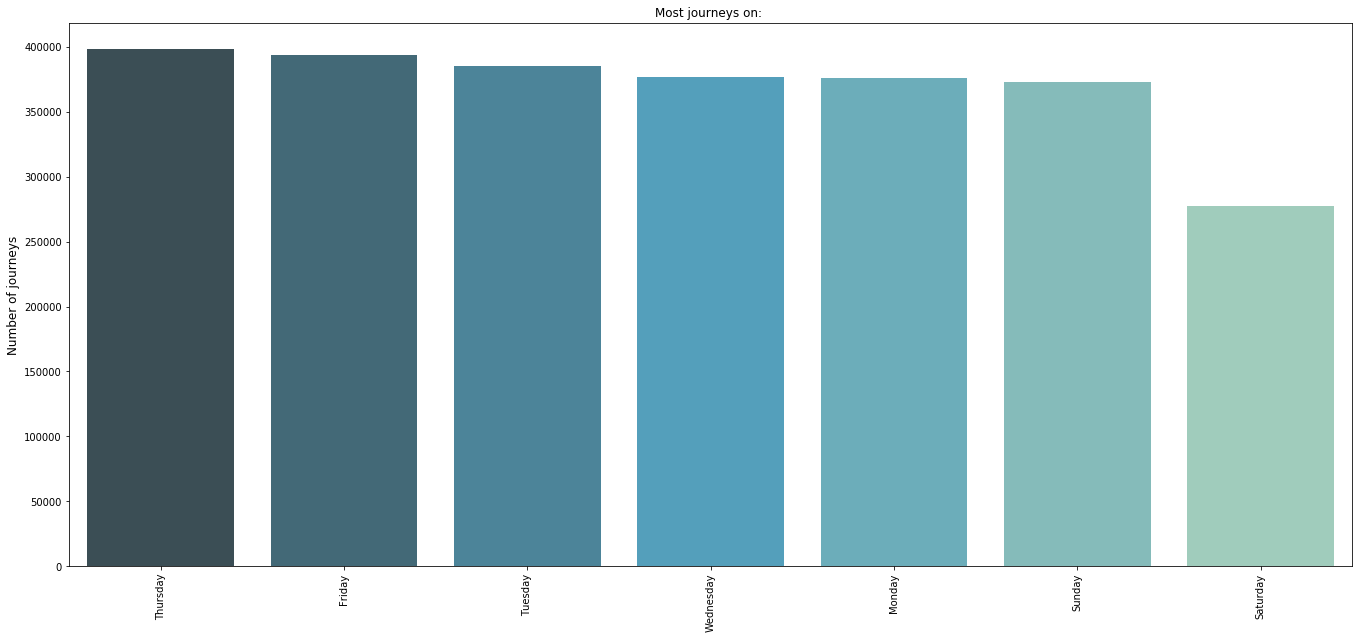

In [32]:
week_day_  = data["start_date_weekday"].value_counts()
plt.figure(figsize=(23,10))
sns.barplot(week_day_.index, week_day_.values, palette = "GnBu_d")
plt.title('Most journeys on: ')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.show()

People travel mostly on Thursday and Friday.

What is the most fav. source and destination among people?

In [0]:
route = data["origin"] + " -to- " +data["destination"]

In [34]:
route.value_counts()

MADRID -to- BARCELONA     480074
MADRID -to- SEVILLA       413155
BARCELONA -to- MADRID     405621
MADRID -to- VALENCIA      399679
SEVILLA -to- MADRID       398445
VALENCIA -to- MADRID      323086
PONFERRADA -to- MADRID     93196
MADRID -to- PONFERRADA     66515
dtype: int64

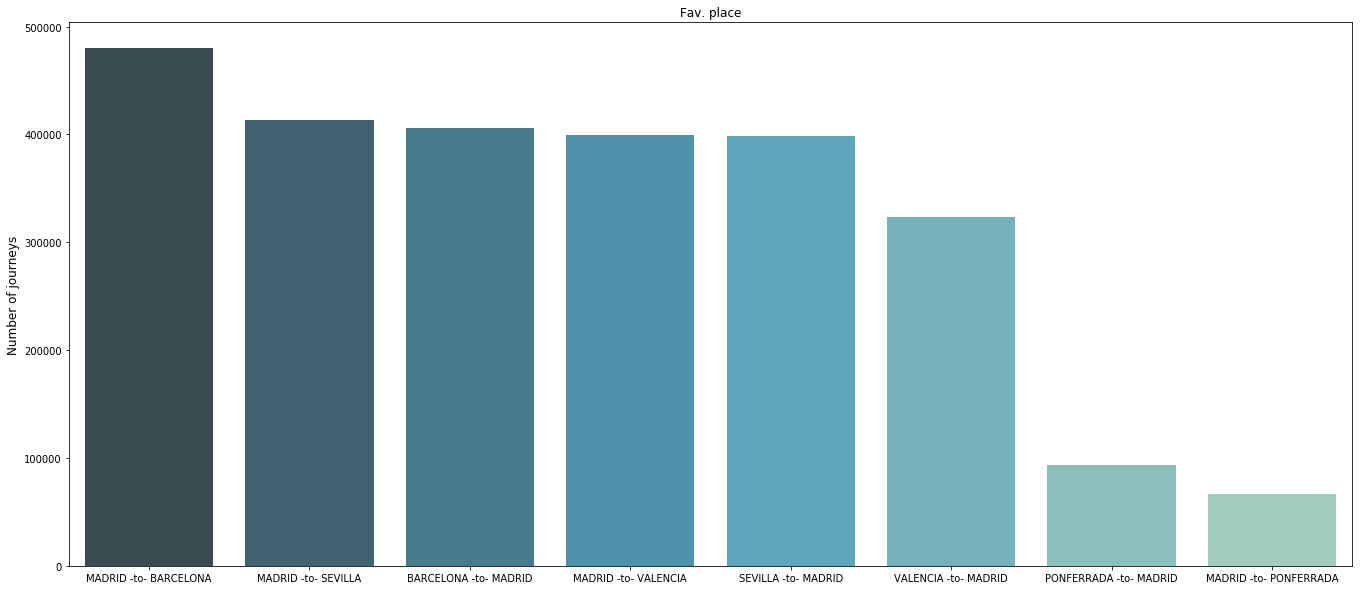

In [35]:
route_  = route.value_counts()
plt.figure(figsize=(23,10))
sns.barplot(route_.index, route_.values, palette = "GnBu_d")
plt.title('Fav. place')
plt.ylabel('Number of journeys', fontsize=12)
plt.show()

Let's fit our model now.

We want to predict price. So lets take price column into another dataframe.

In [0]:
Y = data["price"].values
X = data.drop(["price"],axis = 1)

In [37]:
Y

array([38.55, 53.4 , 47.3 , ..., 72.3 , 76.3 , 49.15])

In [38]:
X.head(5)

,insert_date,origin,destination,start_date,end_date,train_type,train_class,fare,insert_date_hour,insert_date_minute,insert_date_weekday,insert_date_month,insert_date_day,start_date_hour,start_date_minute,start_date_weekday,start_date_month,start_date_day,end_date_hour,end_date_minute,end_date_weekday,end_date_month,end_date_day,is_travelling_end_on_same_day
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,Turista,Promo,5,31,Friday,4,19,6,20,Wednesday,5,29,9,16,Wednesday,5,29,Yes
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,Turista,Promo,5,31,Friday,4,19,7,0,Wednesday,5,29,9,32,Wednesday,5,29,Yes
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,Turista,Promo,5,31,Friday,4,19,7,30,Wednesday,5,29,9,51,Wednesday,5,29,Yes
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,Preferente,Promo,5,31,Friday,4,19,8,0,Wednesday,5,29,10,32,Wednesday,5,29,Yes
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,Turista,Promo,5,31,Friday,4,19,8,30,Wednesday,5,29,11,14,Wednesday,5,29,Yes


Now our problem is categorical data. <br>
We can use one-hot encoding to convert these categorical values.

In [0]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [0]:
X = X.drop(["insert_date","start_date","end_date"],axis=1)

In [0]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X.values)

In [42]:
X

<2579771x364 sparse matrix of type '<class 'numpy.float64'>'
	with 54175191 stored elements in Compressed Sparse Row format>

In [43]:
for category in encoder.categories_:
  print(category)

['BARCELONA' 'MADRID' 'PONFERRADA' 'SEVILLA' 'VALENCIA']
['BARCELONA' 'MADRID' 'PONFERRADA' 'SEVILLA' 'VALENCIA']
['ALVIA' 'AV City' 'AVE' 'AVE-LD' 'AVE-MD' 'AVE-TGV' 'INTERCITY' 'LD'
 'LD-AVE' 'LD-MD' 'MD' 'MD-AVE' 'MD-LD' 'R. EXPRES' 'REGIONAL' 'TRENHOTEL']
['Cama G. Clase' 'Cama Turista' 'Preferente' 'Turista' 'Turista Plus'
 'Turista con enlace']
['Adulto ida' 'Flexible' 'Grupos Ida' 'Individual-Flexible' 'Mesa' 'Promo'
 'Promo +']
[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59]
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
[4 5]
[1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30]
[2 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[0 3 5 8 10 11 14 15 17 18 19 20 21 25 26 28 30 35 36 38 40 42 43 44 45 48
 50 55 58]
['Friday' 'Monday' 'Sat

In [44]:
print(encoder.get_params)

<bound method BaseEstimator.get_params of OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)>


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=22)

In [46]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2063816, 364), (515955, 364), (2063816,), (515955,))

**Let's try with the basic Linear Regression first.**

In [0]:
linear_model = LinearRegression()

In [160]:
linear_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_hat = linear_model.predict(X_train)

In [162]:
print(mean_squared_error(Y_train,y_hat))

109.27775451399957


In [163]:
y_test_hat = linear_model.predict(X_test)
print(mean_squared_error(Y_test,y_test_hat))

109.3856326961067


Clearly, this model is not good due to such high error. We need to try some other model.

**Gradient Boosting**

In [49]:
model = LGBMRegressor(n_estimators = 1000)
model.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
y_test_hat = model.predict(X_test)
print(mean_squared_error(Y_test,y_test_hat))

29.20344225010919


In [52]:
model.score(X_test,Y_test)

0.9515886010400645